<a href="https://colab.research.google.com/github/Ohjinseo2022/Showmeeverything/blob/master/%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
forder = '/content/drive/MyDrive/시각화프로젝트/회귀모델전처리완료/'
files = os.listdir('/content/drive/MyDrive/시각화프로젝트/회귀모델전처리완료')
files

['2012년.csv', '2020년.csv', '2018년.csv', '2016년.csv', '2014년.csv']

In [21]:
apt2012 = pd.read_csv(forder+files[0],encoding='cp949')
apt2014 = pd.read_csv(forder+files[1],encoding='cp949')
apt2016 = pd.read_csv(forder+files[2],encoding='cp949')
apt2018 = pd.read_csv(forder+files[3],encoding='cp949')
apt2020 = pd.read_csv(forder+files[4],encoding='cp949')


In [12]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXSizeFourSym',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif',
 'cmr10',
 'cmb10',
 'DejaVu Serif',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'cmss10',
 'DejaVu Sans',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'DejaVu Sans Display',
 'cmex10',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'cmtt10',
 'cmsy10',
 'STIXSizeTwoSym',
 'STIXSizeOneSym',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Mono',
 'NanumSquare',
 'NanumGothic',
 'NanumGothic',
 'Liberation Mono',
 'NanumMyeongjo',
 'Liberation Mono',
 'Liberation Serif',
 'Liberation Sans Narrow',
 'Liberation Sans',
 'Liberation Sans',
 'NanumSquareRound',
 'NanumSquare',
 'Liberation Sans Narrow',
 'NanumBarunGothic',
 '

In [6]:
apt2012

,행정구,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,평단가
0,영등포구,192.730,11,37,681,42157.0,11,0.01,50.0,565.558
1,강서구,58.140,9,17,664,31596.0,9,0.08,50.0,378.397
2,구로구,84.320,6,2,513,35523.0,7,0.01,50.0,448.885
3,구로구,84.940,2,13,513,35523.0,7,0.01,50.0,288.439
4,영등포구,84.920,7,9,681,42157.0,11,0.01,359.0,677.108
...,...,...,...,...,...,...,...,...,...,...
41074,은평구,59.630,1,1,550,23325.0,13,0.01,359.0,534.966
41075,송파구,76.500,15,34,982,43771.0,28,0.10,50.0,1163.399
41076,송파구,84.790,12,14,982,43771.0,28,0.10,50.0,459.960
41077,강동구,84.980,22,4,713,29694.0,14,0.01,264.9,608.378


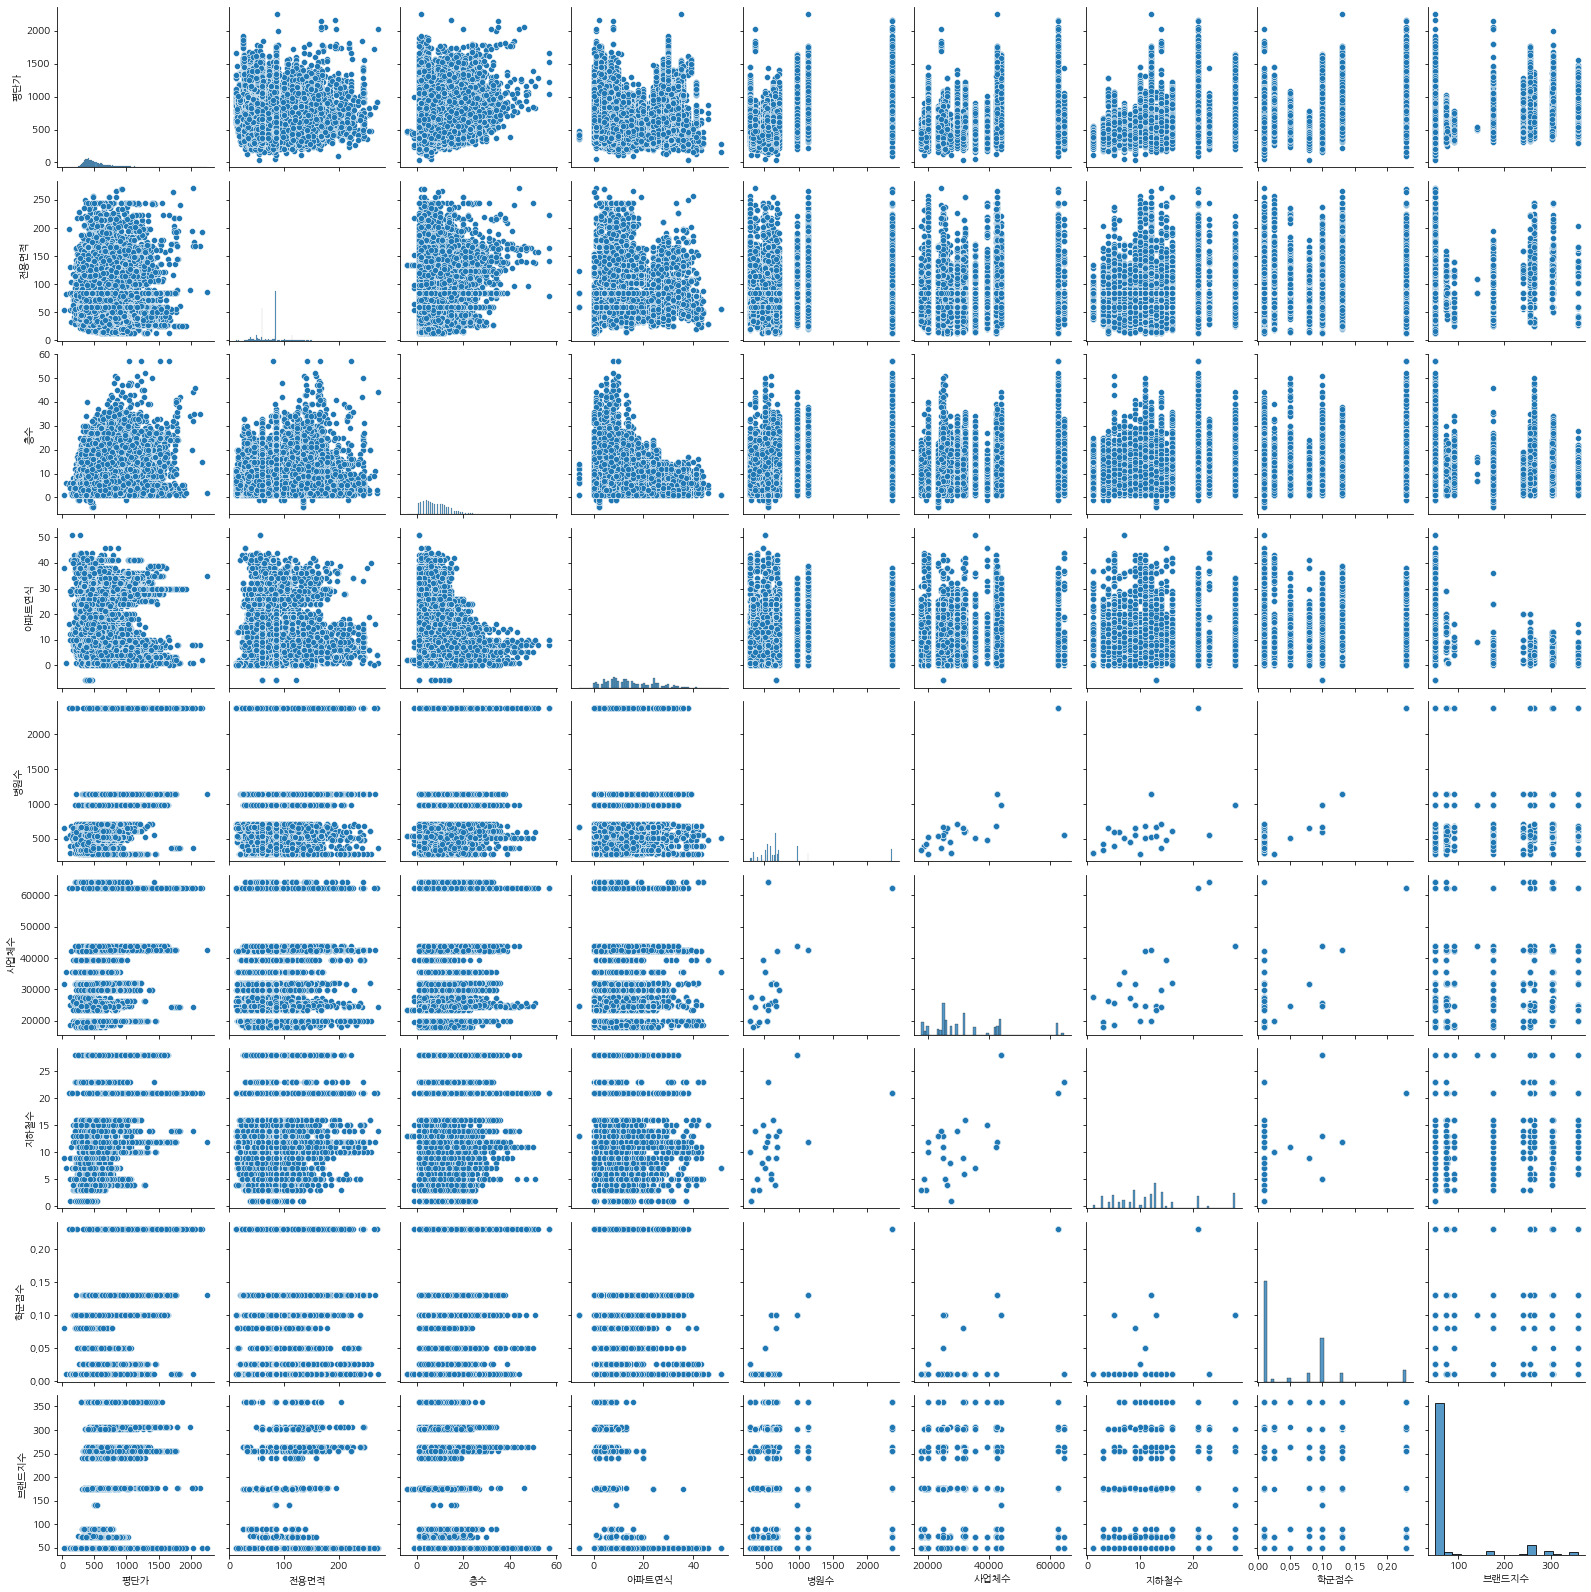

In [8]:
plt.rcParams['font.family'] = 'NanumGothic'
sns.pairplot(apt2012[['평단가','전용면적','층수','아파트연식','병원수','사업체수','지하철수','학군점수','브랜드지수']])
plt.show()

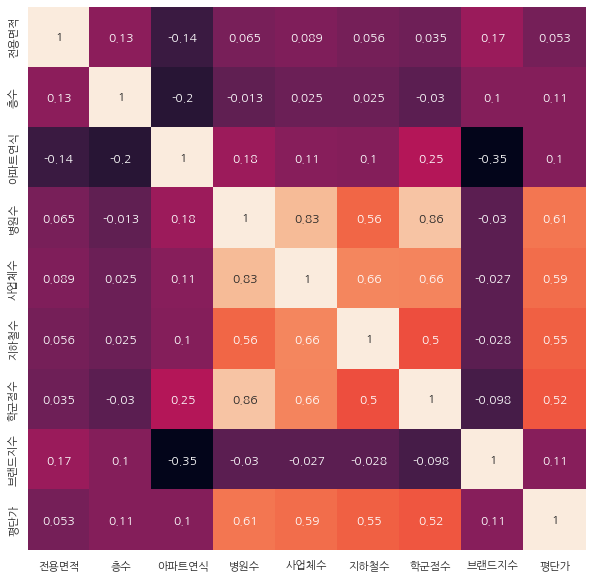

In [15]:
df_corr= apt2012.corr()
plt.rcParams['font.family'] = 'NanumGothic'
#히트맵 
sns.set(font="NanumGothic",
        style='darkgrid',
        font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [17]:
corr_order= apt2012.corr().loc["전용면적":'브랜드지수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

병원수      0.610663
사업체수     0.587667
지하철수     0.550083
학군점수     0.523326
브랜드지수    0.113653
층수       0.105042
아파트연식    0.103487
전용면적     0.053089
Name: 평단가, dtype: float64

In [27]:
# 상위 4개와 종속변수를 따로 빼서 시각화로 분석해준당 

plot_cols = ['평단가','병원수','사업체수','학군점수','브랜드지수']
plot_df = apt2012.loc[:,plot_cols]
plot_df.head()

,평단가,병원수,사업체수,학군점수,브랜드지수
0,565.558,681,42157.0,0.01,50.0
1,378.397,664,31596.0,0.08,50.0
2,448.885,513,35523.0,0.01,50.0
3,288.439,513,35523.0,0.01,50.0
4,677.108,681,42157.0,0.01,359.0


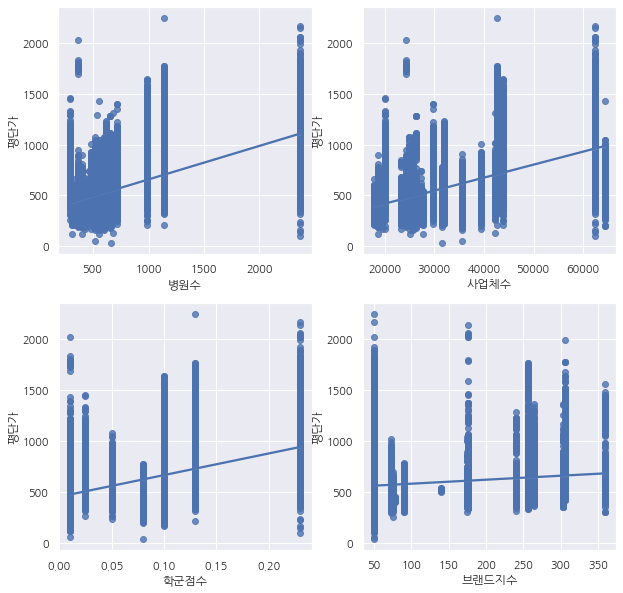

In [28]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1= plt.subplot(2,2,idx+1)
  sns.regplot(x=col,y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

망했다리

In [25]:
# 상위 4개와 종속변수를 따로 빼서 시각화로 분석해준당 

plot_cols = ['평단가','브랜드지수','층수','아파트연식','전용면적']
plot_df = apt2012.loc[:,plot_cols]
plot_df.head()

,평단가,브랜드지수,층수,아파트연식,전용면적
0,565.558,50.0,11,37,192.73
1,378.397,50.0,9,17,58.14
2,448.885,50.0,6,2,84.32
3,288.439,50.0,2,13,84.94
4,677.108,359.0,7,9,84.92


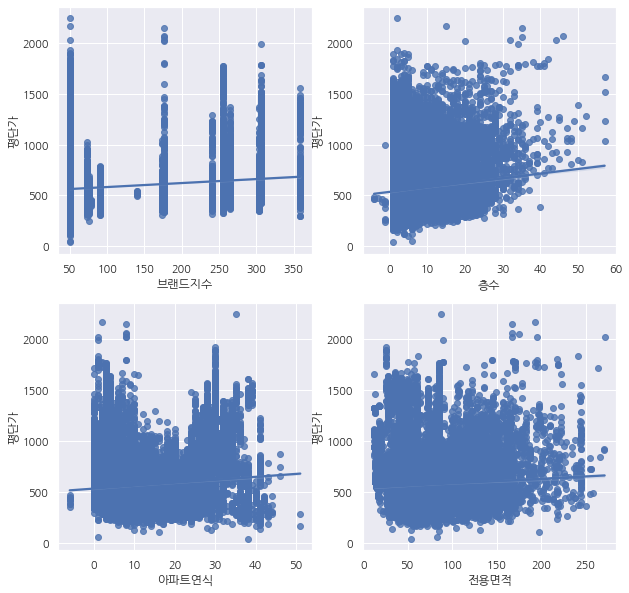

In [26]:
# 데이터가 너무 많아서 정확한 값을 찾을수가 없음...! 

plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1= plt.subplot(2,2,idx+1)
  sns.regplot(x=col,y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

In [29]:
corr_order= apt2014.corr().loc["전용면적":'브랜드지수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

병원수      0.509847
사업체수     0.504397
지하철수     0.447237
학군점수     0.424503
브랜드지수    0.225457
층수       0.166098
아파트연식    0.077277
전용면적     0.016058
Name: 평단가, dtype: float64

In [30]:
corr_order= apt2016.corr().loc["전용면적":'브랜드지수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

병원수      0.553141
사업체수     0.510448
학군점수     0.459725
지하철수     0.459635
브랜드지수    0.156632
층수       0.119896
아파트연식    0.033069
전용면적     0.023827
Name: 평단가, dtype: float64

In [31]:
corr_order= apt2018.corr().loc["전용면적":'브랜드지수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

병원수      0.604231
사업체수     0.564882
학군점수     0.524796
지하철수     0.479465
브랜드지수    0.131425
층수       0.083067
아파트연식    0.025211
전용면적     0.014194
Name: 평단가, dtype: float64

In [32]:
corr_order= apt2020.corr().loc["전용면적":'브랜드지수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

병원수      0.594101
사업체수     0.572169
학군점수     0.523239
지하철수     0.500812
브랜드지수    0.152074
층수       0.099265
전용면적     0.048747
아파트연식    0.016837
Name: 평단가, dtype: float64

# 아파트 관련 매개변수가 너무 많아서 상관계수 갭차이가 많이나는거로 예상됨 행정구별 평균값으로 데이터 다시 전처리 

In [49]:
address = apt2012['행정구'].unique().tolist()

In [63]:
new_apt2012 = []
for i in address:
  new_apt2012.append(apt2012[apt2012['행정구']==i].mean().tolist())

<ipython-input-63-f2928acb9986>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_apt2012.append(apt2012[apt2012['행정구']==i].mean().tolist())


In [64]:
new_apt2012

[[72.47737457428069,
  9.247210804462712,
  15.412800939518498,
  681.0,
  42157.0,
  11.0,
  0.009999999999999997,
  83.87304756312389,
  544.680048737522],
 [70.84677624760077,
  7.883877159309021,
  12.283589251439539,
  664.0,
  31596.0,
  9.0,
  0.07999999999999999,
  84.7943857965451,
  451.11384500959696],
 [71.57602673592127,
  9.475123018042646,
  12.527063969382176,
  513.0,
  35523.0,
  7.0,
  0.01,
  71.38381629305631,
  428.46909404045925],
 [70.32407123991196,
  8.893617021276595,
  10.830520909757887,
  651.0,
  26294.0,
  4.0,
  0.009999999999999998,
  76.90095377842994,
  498.30403815113726],
 [71.54417265803504,
  8.782939832444782,
  13.331302361005331,
  460.0,
  27289.0,
  8.0,
  0.009999999999999998,
  60.0997715156131,
  404.7906496572733],
 [77.72981122159091,
  9.479166666666666,
  8.860321969696969,
  553.0,
  25061.0,
  9.0,
  0.009999999999999998,
  133.52817234848484,
  442.72605350378785],
 [81.56410862453532,
  8.269888475836431,
  19.213754646840147,
  2

In [65]:
col_name=['전용면적' ,'층수' ,'아파트연식', '병원수' , '사업체수', '지하철수' , '학군점수' , '브랜드지수','평단가']
apt2012df = pd.DataFrame(new_apt2012,columns=col_name)


In [66]:
apt2012df

,전용면적,층수,아파트연식,병원수,사업체수,지하철수,학군점수,브랜드지수,평단가
0,72.477375,9.247211,15.412801,681.0,42157.0,11.0,0.010,83.873048,544.680049
1,70.846776,7.883877,12.283589,664.0,31596.0,9.0,0.080,84.794386,451.113845
2,71.576027,9.475123,12.527064,513.0,35523.0,7.0,0.010,71.383816,428.469094
3,70.324071,8.893617,10.830521,651.0,26294.0,4.0,0.010,76.900954,498.304038
4,71.544173,8.782940,13.331302,460.0,27289.0,8.0,0.010,60.099772,404.790650
5,77.729811,9.479167,8.860322,553.0,25061.0,9.0,0.010,133.528172,442.726054
6,81.564109,8.269888,19.213755,2369.0,62448.0,21.0,0.230,70.685725,1032.222753
7,78.025876,8.136590,13.051844,397.0,18653.0,5.0,0.010,75.487537,450.534767
8,93.181963,8.926710,14.206840,287.0,20004.0,10.0,0.025,85.532573,768.827976
9,78.504298,9.591879,8.857536,596.0,31881.0,6.0,0.010,84.358568,449.518321


In [53]:
len(new_apt2012)

25

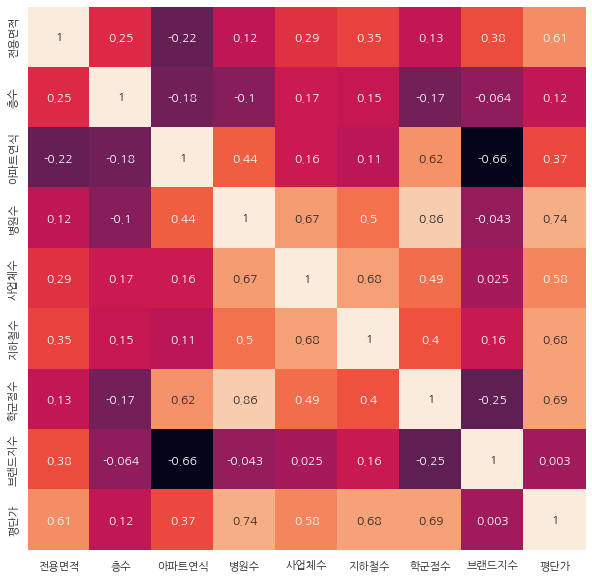

In [67]:
df_corr= apt2012df.corr()
plt.rcParams['font.family'] = 'NanumGothic'
#히트맵 
sns.set(font="NanumGothic",
        style='darkgrid',
        font_scale=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [68]:
corr_order= apt2012df.corr().loc["전용면적":'브랜드지수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

병원수      0.736263
학군점수     0.688256
지하철수     0.682069
전용면적     0.609774
사업체수     0.579473
아파트연식    0.367103
층수       0.124860
브랜드지수    0.002952
Name: 평단가, dtype: float64

In [74]:
# 상위 4개와 종속변수를 따로 빼서 시각화로 분석해준당 

plot_cols = ['평단가','병원수','학군점수','지하철수','전용면적']
plot_df = apt2012df.loc[:,plot_cols]
plot_df.head()

,평단가,병원수,학군점수,지하철수,전용면적
0,516.4400,681.0,0.01,11.0,78.15
1,443.9745,664.0,0.08,9.0,70.42
2,413.1310,513.0,0.01,7.0,73.22
3,459.6890,651.0,0.01,4.0,68.80
4,401.4520,460.0,0.01,8.0,75.03


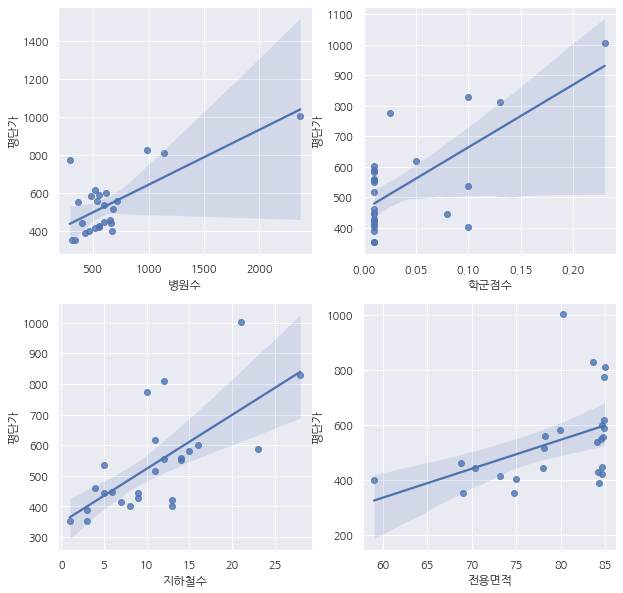

In [75]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1= plt.subplot(2,2,idx+1)
  sns.regplot(x=col,y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()

# 중앙값으로 처리 해봄

In [69]:
address = apt2012['행정구'].unique().tolist()
new_apt2012 = []
for i in address:
  new_apt2012.append(apt2012[apt2012['행정구']==i].median().tolist())
col_name=['전용면적' ,'층수' ,'아파트연식', '병원수' , '사업체수', '지하철수' , '학군점수' , '브랜드지수','평단가']
apt2012df = pd.DataFrame(new_apt2012,columns=col_name)

<ipython-input-69-9fed85475dd0>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_apt2012.append(apt2012[apt2012['행정구']==i].median().tolist())
<ipython-input-69-9fed85475dd0>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_apt2012.append(apt2012[apt2012['행정구']==i].median().tolist())
<ipython-input-69-9fed85475dd0>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_apt2012.append(apt2012[apt2012['행정구']==i].median().tolist())
<ipython-input-69-9fed85475dd0>:4: FutureWarning: Dr

In [70]:
corr_order= apt2012df.corr().loc["전용면적":'브랜드지수','평단가'].abs().sort_values(ascending=False) ## abs() 함수를 사용하여 상관계수의 값을 모두 양수로 변경 
# sort_values() ascending =False 옵션을 적용하여 상관계수 값을 기ㄴ준으로 내림차순 정렬 처리하였다 
corr_order

병원수      0.719372
지하철수     0.693475
학군점수     0.684141
사업체수     0.589363
전용면적     0.443427
층수       0.224095
아파트연식    0.181341
브랜드지수         NaN
Name: 평단가, dtype: float64

In [72]:
# 상위 4개와 종속변수를 따로 빼서 시각화로 분석해준당 

plot_cols = ['평단가','병원수','지하철수','학군점수','사업체수']
plot_df = apt2012df.loc[:,plot_cols]
plot_df.head()

,평단가,병원수,지하철수,학군점수,사업체수
0,516.4400,681.0,11.0,0.01,42157.0
1,443.9745,664.0,9.0,0.08,31596.0
2,413.1310,513.0,7.0,0.01,35523.0
3,459.6890,651.0,4.0,0.01,26294.0
4,401.4520,460.0,8.0,0.01,27289.0


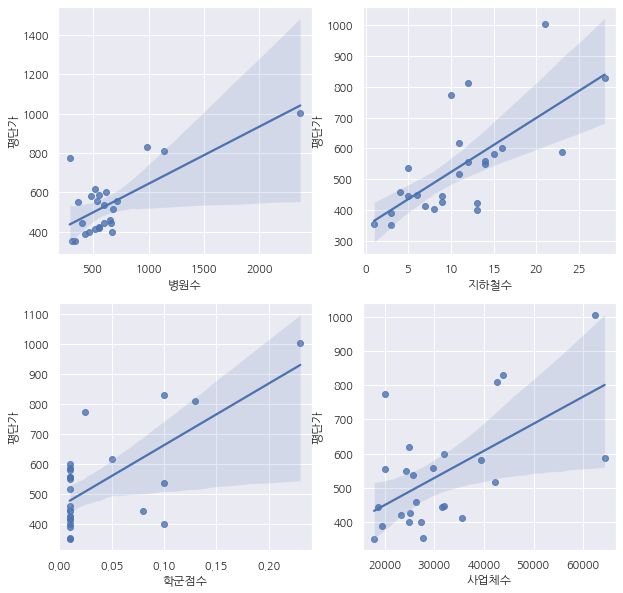

In [73]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
  ax1= plt.subplot(2,2,idx+1)
  sns.regplot(x=col,y=plot_cols[0], data=plot_df, ax=ax1)
plt.show()